In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import dask
import babet as bb
from moarpalettes import get_palette
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as patches
from cmcrameri import cm
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter, ScalarFormatter
from moarpalettes import get_palette
from matplotlib.cm import ScalarMappable

sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)
# inidates = ['2023-10-11', '2023-10-15', '2023-10-17']
inidates = ['2023-10-15', '2023-10-17']
experiments = ['pi', 'curr', 'incr']

dask.config.set(**{'array.slicing.split_large_chunks': True})

In [3]:
color_palette = get_palette.Petroff6().to_sn_palette()
color_palette

[(0.3411764705882353, 0.5647058823529412, 0.9882352941176471),
 (0.9725490196078431, 0.611764705882353, 0.12549019607843137),
 (0.8941176470588236, 0.1450980392156863, 0.21176470588235294),
 (0.5882352941176471, 0.2901960784313726, 0.5450980392156862),
 (0.611764705882353, 0.611764705882353, 0.6313725490196078),
 (0.47843137254901963, 0.12941176470588237, 0.8666666666666667)]

In [4]:
# Plot settings
uk = [-10.5, 9.5, 45.5, 61.3] # longitude min, longitude max, latitude min, latitude max
northsea = [-17, 20, 40, 70]

# RACMO analogues

## Load data

In [5]:
racmo_msl, _ = bb.data.Data.get_racmo_indiv_analogues() # Don't need precip here

Importing data from pre-existing file


In [6]:
# check if file exists
if not os.path.exists('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/RACMO_analogues_dynamics_latf.nc'): 
    # qvi
    tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__qvi__1951-1980_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["1950"])
    tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__qvi__1991-2020_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["present"])
    tmp3 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__qvi__2071-2100_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["future1"])
    tmp4 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__qvi__2071-2100_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["future2"])

    tmp1_ = bb.data.Data.regrid_racmo(tmp1).rename_dims({'ana': 'member'})
    tmp2_ = bb.data.Data.regrid_racmo(tmp2).rename_dims({'ana': 'member'})
    tmp3_ = bb.data.Data.regrid_racmo(tmp3).rename_dims({'ana': 'member'})
    tmp4_ = bb.data.Data.regrid_racmo(tmp4).rename_dims({'ana': 'member'})
    racmo_qvi = xr.concat([tmp1_, tmp2_, tmp3_, tmp4_], dim="climate")

    # latf
    tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__latf__1951-1980_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["1950"])
    tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__latf__1991-2020_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["present"])
    tmp3 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__latf__2071-2100_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["future1"])
    tmp4 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/analogs_Babet_A20231020_KNMI_RACMO__latf__2071-2100_3dy_ave.nc').swap_dims({'time': 'ana'}).expand_dims(climate=["future2"])

    tmp1_ = bb.data.Data.regrid_racmo(tmp1).rename_dims({'ana': 'member'})
    tmp2_ = bb.data.Data.regrid_racmo(tmp2).rename_dims({'ana': 'member'})
    tmp3_ = bb.data.Data.regrid_racmo(tmp3).rename_dims({'ana': 'member'})
    tmp4_ = bb.data.Data.regrid_racmo(tmp4).rename_dims({'ana': 'member'})
    racmo_latf = xr.concat([tmp1_, tmp2_, tmp3_, tmp4_], dim="climate")

    # save to file
    racmo_latf.to_netcdf('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/RACMO_analogues_dynamics_latf.nc')
    racmo_qvi.to_netcdf('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/RACMO_analogues_dynamics_qvi.nc')
else:
    print('Importing data from pre-existing files')
    racmo_latf = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/RACMO_analogues_dynamics_latf.nc')
    racmo_qvi = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/RACMO_analogues/RACMO_analogues_dynamics_qvi.nc')

Importing data from pre-existing files


In [6]:
racmo_latf = racmo_latf.mean(dim='member').compute()
racmo_qvi = racmo_qvi.mean(dim='member').compute()
racmo_msl = racmo_msl.mean(dim='member').compute()

## Plot

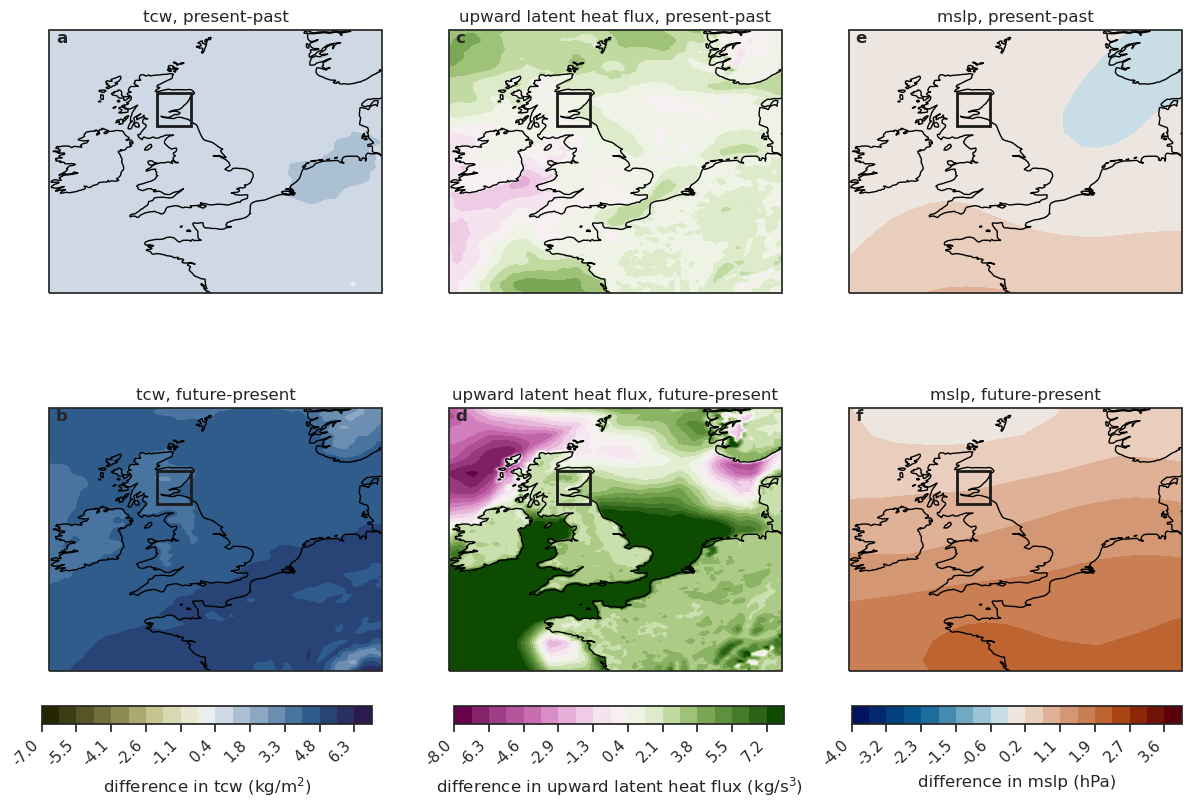

In [7]:
# Create figure
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 9), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot saturation specific humidity
vmax = 7
plot1 = (racmo_qvi.sel(climate='present')-racmo_qvi.sel(climate='1950')).qvi.plot.contourf(
    cmap=cm.broc_r,vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[0, 0], add_colorbar=False  # Disable individual colorbars
)
plot2 = (racmo_qvi.sel(climate='future1')-racmo_qvi.sel(climate='present')).qvi.plot.contourf(
    cmap=cm.broc_r, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[1, 0], add_colorbar=False  # Disable individual colorbars
)

# Plot vertical velocity
vmax = 8
plot3 = (racmo_latf.sel(climate='present')-racmo_latf.sel(climate='1950')).latf.plot.contourf(
    cmap=cm.bam, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[0,1], add_colorbar=False  # Disable individual colorbars
)
plot4 = (racmo_latf.sel(climate='future1')-racmo_latf.sel(climate='present')).latf.plot.contourf(
    cmap=cm.bam, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[1,1], add_colorbar=False  # Disable individual colorbars
)

# Plot mean sea level pressure
vmax = 4
plot5 = ((racmo_msl.sel(climate='present')-racmo_msl.sel(climate='1950')).msl/100).plot.contourf(
    cmap=cm.vik, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[0,2], add_colorbar=False  # Disable individual colorbars
)
plot6= ((racmo_msl.sel(climate='future1')-racmo_msl.sel(climate='present')).msl/100).plot.contourf(
    cmap=cm.vik, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[1,2], add_colorbar=False  # Disable individual colorbars
)

# Add horizontal colorbars
cbar_ax1 = fig.add_axes([0.12, 0.08, 0.22, 0.02])  # Bottom of first column
cbar1 = fig.colorbar(plot1, cax=cbar_ax1, orientation="horizontal", label="difference in tcw (kg/m$^2$)")
cbar1.ax.xaxis.set_label_position('bottom')
cbar1.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar1.update_ticks()

cbar_ax2 = fig.add_axes([0.395, 0.08, 0.22, 0.02])  # Bottom of second column
cbar2 = fig.colorbar(plot3, cax=cbar_ax2, orientation="horizontal", label=r"difference in upward latent heat flux (kg/s$^3$)")
cbar2.ax.xaxis.set_label_position('bottom')
cbar2.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar2.update_ticks()

cbar_ax3 = fig.add_axes([0.66, 0.08, 0.22, 0.02])  # Bottom of third column
cbar3 = fig.colorbar(plot5, cax=cbar_ax3, orientation="horizontal", label="difference in mslp (hPa)")
cbar3.ax.xaxis.set_label_position('bottom')
cbar3.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar3.update_ticks()

for cbar in [cbar1, cbar2, cbar3]:  
    for label in cbar.ax.get_xticklabels():  # For horizontal colorbars  
        label.set_rotation(45)  
        label.set_ha('right')  # Align labels to the right for better readability


# Add figure labels
axes[0, 0].text(0.02, 0.95, "a", transform=axes[0, 0].transAxes, fontsize=12, fontweight="bold")
axes[1, 0].text(0.02, 0.95, "b", transform=axes[1, 0].transAxes, fontsize=12, fontweight="bold")
axes[0, 1].text(0.02, 0.95, "c", transform=axes[0, 1].transAxes, fontsize=12, fontweight="bold")
axes[1, 1].text(0.02, 0.95, "d", transform=axes[1, 1].transAxes, fontsize=12, fontweight="bold")
axes[0, 2].text(0.02, 0.95, "e", transform=axes[0, 2].transAxes, fontsize=12, fontweight="bold")
axes[1, 2].text(0.02, 0.95, "f", transform=axes[1, 2].transAxes, fontsize=12, fontweight="bold")

# Apply Cartopy settings to both axes
titles = [f"tcw, present-past", f"upward latent heat flux, present-past", f"mslp, present-past",
         f"tcw, future-present", f"upward latent heat flux, future-present",  f"mslp, future-present"]
for ax, title in zip(axes.flatten(), titles):
    ax.set_extent(uk, crs=ccrs.PlateCarree())  # Set map extent
    ax.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.8)  # Add land borders
    ax.add_feature(cfeature.OCEAN, facecolor='white')  # Mask ocean
    ax.coastlines()  # Add coastlines
    ax.set_title(title, fontsize=12)  # Set

    rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                edgecolor='k', 
                                facecolor='none',
                                transform=ccrs.PlateCarree())
    ax.add_patch(rectangle)
    rectangle.set_zorder(17)
plt.subplots_adjust(right=0.88)

# Save the figure
plt.savefig('figures/PAPER8_racmo_dynamics.png', dpi=600, bbox_inches='tight')
plt.savefig('figures/PAPER8_racmo_dynamics.pdf')

# ERA5 analogues

## Load data

In [5]:
era5_analogues = bb.data.Data.get_era5_analogues().mean(dim='member').compute()

Importing data from pre-existing file


In [6]:
# check if files exist, if not, create them
if not os.path.exists('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/ERA5_analogues_dynamics.nc'): 
    # Total column water
    tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/analogues24_tw_past2.nc').expand_dims(climate=["1950"])
    tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/analogues24_tw_prst2.nc').expand_dims(climate=["present"])

    tmp = xr.concat([tmp1, tmp2], dim="climate")

    # Find all variables that start with "unknown"
    tcw_vars = sorted([var for var in tmp.data_vars if var.startswith("tcw")])

    # Stack all precipitation variables along the new 'member' dimension
    tcw = xr.concat([tmp[var] for var in tcw_vars], dim="member")

    # Assign member values from 1 to 27
    tcw = tcw.assign_coords(member=np.arange(1, len(tcw_vars) + 1))

    # Create a new dataset with the combined variable
    era5_dynamics = xr.Dataset({"tcw": tcw}, coords={"lat": tmp.latitude, "lon": tmp.longitude, "member": tcw.member})

    # Vertical velocity
    tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/analogues_vv_past2.nc').expand_dims(climate=["1950"])
    tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/analogues_vv_prst2.nc').expand_dims(climate=["present"])

    tmp = xr.concat([tmp1, tmp2], dim="climate")

    # Find all variables that start with "unknown"
    w_vars = sorted([var for var in tmp.data_vars if var.startswith("w")])

    # Stack all precipitation variables along the new 'member' dimension
    w = xr.concat([tmp[var] for var in w_vars], dim="member")

    # Assign member values from 1 to 27
    w = w.assign_coords(member=np.arange(1, len(w_vars) + 1))

    # Create a new dataset with the combined variable
    era5_dynamics = xr.merge([era5_dynamics,
                            xr.Dataset({"w": w}, coords={"lat": tmp.latitude, "lon": tmp.longitude, "member": w.member})], compat="override")

    # save to file
    era5_dynamics.to_netcdf('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/ERA5_analogues_dynamics.nc')
else:
    print('Importing data from pre-existing files')
    era5_dynamics = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/ERA5_analogues_dynamics.nc')


Importing data from pre-existing files


In [7]:
era5_dynamics = era5_dynamics.mean(dim='member').compute()

## Plot

In [8]:
from metpy import calc as mpcalc
from metpy.units import units

In [9]:
era5_dynamics

<xarray.Dataset>
Dimensions:          (climate: 2, latitude: 79, longitude: 85)
Coordinates: (12/81)
    day_of_month_16  int64 26
  * climate          (climate) object '1950' 'present'
  * latitude         (latitude) float64 64.75 64.5 64.25 ... 45.75 45.5 45.25
  * longitude        (longitude) float64 -11.0 -10.75 -10.5 ... 9.5 9.75 10.0
    day_of_month     (climate) int64 6 20
    month            (climate) |S3 b'Nov' b'Sep'
    ...               ...
    valid_time_24    (climate) datetime64[ns] 1953-09-23T12:00:00 2001-10-21T...
    year_24          (climate) int64 1953 2001
    valid_time_25    (climate) datetime64[ns] 1978-09-06T12:00:00 2013-09-30T...
    year_25          (climate) int64 1978 2013
    lat              (latitude) float64 64.75 64.5 64.25 ... 45.75 45.5 45.25
    lon              (longitude) float64 -11.0 -10.75 -10.5 ... 9.5 9.75 10.0
Data variables:
    tcw              (climate, latitude, longitude) float32 11.77 11.8 ... 25.93
    w                (climate, latitude, longitude) float32 -0.02244 ... -0.2479

In [10]:
era5_analogues

<xarray.Dataset>
Dimensions:          (climate: 2, lat: 40, lon: 42)
Coordinates: (12/79)
  * climate          (climate) object '1950' 'present'
  * lat              (lat) float32 64.88 64.38 63.88 63.38 ... 46.38 45.88 45.38
  * lon              (lon) float64 -10.88 -10.38 -9.875 ... 8.625 9.125 9.625
    day_of_month     (climate) int64 7 21
    month            (climate) |S3 b'Nov' b'Sep'
    season           |S3 b'son'
    ...               ...
    year_23          (climate) int64 1954 2005
    day_of_month_16  (climate) int64 24 27
    time_24          (climate) datetime64[ns] 1953-09-24 2001-10-22
    year_24          (climate) int64 1953 2001
    time_25          (climate) datetime64[ns] 1978-09-07 2013-10-01
    year_25          (climate) int64 1978 2013
Data variables:
    tp               (climate, lat, lon) float32 9.671 9.76 9.9 ... 41.4 31.66
    msl              (climate, lat, lon) float32 1.005e+05 ... 1.004e+05
    t2m              (climate, lat, lon) float32 277.7 277.8 ... 286.0 286.1

In [11]:
xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5_analogues/analogues_vv_prst2.nc').expand_dims(climate=["present"])

<xarray.Dataset>
Dimensions:             (latitude: 79, longitude: 85, bnds: 2, climate: 1)
Coordinates: (12/79)
  * climate             (climate) <U7 'present'
  * latitude            (latitude) float64 64.75 64.5 64.25 ... 45.75 45.5 45.25
  * longitude           (longitude) float64 -11.0 -10.75 -10.5 ... 9.5 9.75 10.0
    day_of_month        int64 ...
    month               |S3 ...
    season              |S3 ...
    ...                  ...
    valid_time_23       datetime64[ns] ...
    year_23             int64 ...
    valid_time_24       datetime64[ns] ...
    year_24             int64 ...
    valid_time_25       datetime64[ns] ...
    year_25             int64 ...
Dimensions without coordinates: bnds
Data variables: (12/54)
    w                   (climate, latitude, longitude) float32 0.03649 ... -0...
    valid_time_bnds     (climate, bnds) datetime64[ns] 1999-09-20T12:00:00 19...
    w_0                 (climate, latitude, longitude) float32 0.0503 ... -0....
    valid_time_0_bnds   (climate, bnds) datetime64[ns] 2019-11-04T12:00:00 20...
    w_1                 (climate, latitude, longitude) float32 -0.03273 ... -...
    valid_time_1_bnds   (climate, bnds) datetime64[ns] 1993-10-02T12:00:00 19...
    ...                  ...
    w_23                (climate, latitude, longitude) float32 0.07757 ... -0...
    valid_time_23_bnds  (climate, bnds) datetime64[ns] 2005-11-26T12:00:00 20...
    w_24                (climate, latitude, longitude) float32 0.03191 ... 0....
    valid_time_24_bnds  (climate, bnds) datetime64[ns] 2001-10-21T12:00:00 20...
    w_25                (climate, latitude, longitude) float32 -0.03923 ... 0...
    valid_time_25_bnds  (climate, bnds) datetime64[ns] 2013-09-30T12:00:00 20...
Attributes: (12/35)
    CDI:                                      Climate Data Interface version ...
    CDO:                                      Climate Data Operators version ...
    GRIB_NV:                                  0
    GRIB_Nx:                                  1440
    GRIB_Ny:                                  721
    GRIB_centre:                              ecmf
    ...                                       ...
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_units:                               Pa s**-1
    GRIB_uvRelativeToGrid:                    0
    frequency:                                day
    institution:                              European Centre for Medium-Rang...
    Conventions:                              CF-1.7

In [12]:
# calculate vertical velocity in mm/s
# era5_w_mm_s = mpcalc.vertical_velocity(era5_dynamics['w']* units('Pa/s'), era5_dynamics['level']* units.hPa, era5_analogues['t']* units.kelvin)*1000

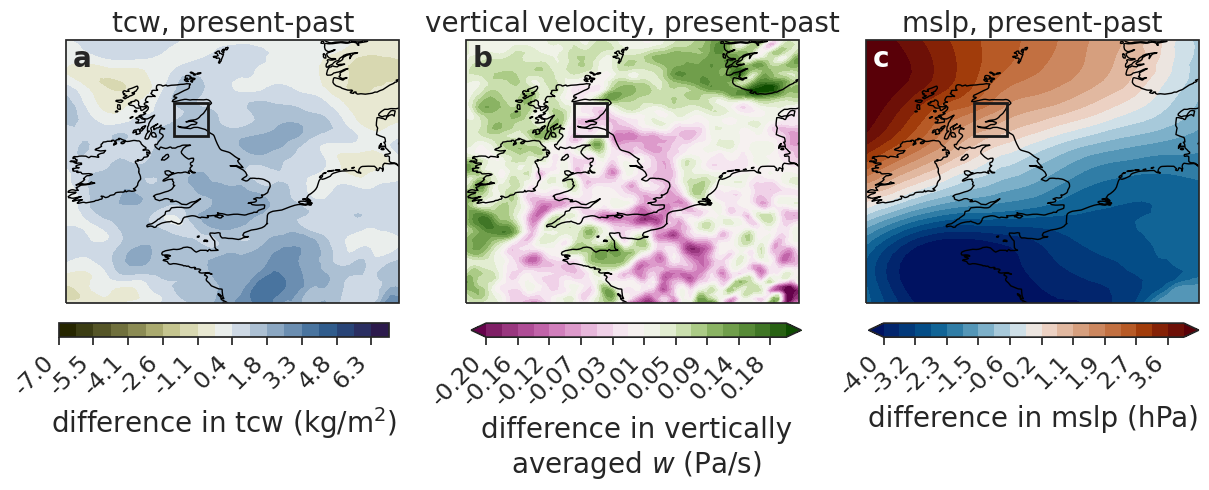

In [53]:
# Create figure
fs = 20
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 4), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot saturation specific humidity
vmax = 7
plot1 = (era5_dynamics.sel(climate='present')-era5_dynamics.sel(climate='1950')).tcw.plot.contourf(
    cmap=cm.broc_r, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[0], add_colorbar=False  # Disable individual colorbars
)

# Plot vertical velocity
vmax = 0.2
plot3 = (era5_dynamics.sel(climate='present')-era5_dynamics.sel(climate='1950')).w.plot.contourf(
    cmap=cm.bam, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[1], add_colorbar=False  # Disable individual colorbars
)
# Plot mean sea level pressure
vmax = 4
plot5 = ((era5_analogues.sel(climate='present')-era5_analogues.sel(climate='1950')).msl/100).plot.contourf(
    cmap=cm.vik, vmin=-1*vmax, vmax=vmax,
    levels=20, ax=axes[2], add_colorbar=False  # Disable individual colorbars
)

# Add horizontal colorbars
cbar_ax1 = fig.add_axes([0.12, 0.08, 0.22, 0.035])  # Bottom of first column
cbar1 = fig.colorbar(plot1, cax=cbar_ax1, orientation="horizontal", label="difference in tcw (kg/m$^2$)")
cbar1.set_label("difference in tcw (kg/m$^2$)", fontsize=fs)
cbar1.ax.xaxis.set_label_position('bottom')
cbar1.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar1.ax.tick_params(labelsize=fs-3)
cbar1.update_ticks()

cbar_ax2 = fig.add_axes([0.395, 0.08, 0.22, 0.035])  # Bottom of second column
cbar2 = fig.colorbar(plot3, cax=cbar_ax2, orientation="horizontal", label=r"difference in vertically averaged $w$ (Pa/s)")
cbar2.set_label("difference in vertically\naveraged $w$ (Pa/s)", fontsize=fs)
cbar2.ax.xaxis.set_label_position('bottom')
cbar2.formatter = FormatStrFormatter("%.2f")  # Restrict to 2 decimal places
cbar2.ax.tick_params(labelsize=fs-3)
cbar2.update_ticks()

cbar_ax3 = fig.add_axes([0.66, 0.08, 0.22, 0.035])  # Bottom of third column
cbar3 = fig.colorbar(plot5, cax=cbar_ax3, orientation="horizontal", label="difference in mslp (hPa)")
cbar3.set_label("difference in mslp (hPa)", fontsize=fs)
cbar3.ax.xaxis.set_label_position('bottom')
cbar3.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar3.ax.tick_params(labelsize=fs-3)
cbar3.update_ticks()

# # Add the colourbar for tcwv
# vmin = 2
# norm = plt.Normalize(vmin=-vmax, vmax=vmax)
# sm = ScalarMappable(cmap=cm.broc_r, norm=norm)
# cbar_tcwv_ax = fig.add_axes([0.12, 2, 0.22, 0.035])  # left, bottom, width, height
# cbar_tcwv_ax.frameon = False
# cbar_tcwv = fig.colorbar(sm, ax=cbar_tcwv_ax, orientation="horizontal")
# cbar_tcwv.set_label("difference in tcwv (kg/m$^2$)", fontsize=fs)
# cbar_tcwv.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
# cbar_tcwv.ax.tick_params(labelsize=fs-3)
# cbar_tcwv.update_ticks()

# angled labels for colourbars
for cbar in [cbar1, cbar2, cbar3]:  
    for label in cbar.ax.get_xticklabels():  # For horizontal colorbars  
        label.set_rotation(45)  
        label.set_ha('right')  # Align labels to the right for better readability


# Add figure labels
axes[0].text(0.02, 0.9, "a", transform=axes[0].transAxes, fontsize=fs, fontweight="bold")
axes[1].text(0.02, 0.9, "b", transform=axes[1].transAxes, fontsize=fs, fontweight="bold")
axes[2].text(0.02, 0.9, "c", transform=axes[2].transAxes, fontsize=fs, fontweight="bold", color='white')

# Apply Cartopy settings to both axes
titles = [f"tcw, present-past", f"vertical velocity, present-past", f"mslp, present-past"]
for ax, title in zip(axes.flatten(), titles):
    ax.set_extent(uk, crs=ccrs.PlateCarree())  # Set map extent
    ax.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.8)  # Add land borders
    ax.add_feature(cfeature.OCEAN, facecolor='white')  # Mask ocean
    ax.coastlines()  # Add coastlines
    ax.set_title(title, fontsize=fs)  # Set

    rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                edgecolor='k', 
                                facecolor='none',
                                transform=ccrs.PlateCarree())
    ax.add_patch(rectangle)
    rectangle.set_zorder(17)
plt.subplots_adjust(right=0.88)

# Save the figure
# plt.savefig('figures/PAPER8_era5_dynamics.png', dpi=600, bbox_inches='tight')
# plt.savefig('figures/PAPER8_era5_dynamics.pdf')

# With ACCESS MICAS

## ACCESS MICAS data

In [11]:
micas_sfc = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_clean.nc')

In [12]:
# FBA ACCESS

# check if file exists
if not os.path.exists('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_clean_dynamics.nc'):
    # precip
    tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_hus_highGHG.nc').expand_dims(climate=["future1"])
    tmp2 =xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_hus_lowGHG.nc').expand_dims(climate=["1870"])
    tmp3 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_hus_ctrl.nc').expand_dims(climate=["present"])
    ds = xr.concat([tmp1, tmp2, tmp3], dim="climate").rename_dims({"z1_p_level": "level"}).rename_vars({"hus": "q", 'z1_p_level': 'level'})

    # vertical velocity
    tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_wa_highGHG.nc').expand_dims(climate=["future1"]).rename_dims({"z1_p_level": "level"}).rename_vars({"wa": "w", 'z1_p_level': 'level'})
    tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_wa_lowGHG.nc').expand_dims(climate=["1870"]).rename_dims({"z1_p_level": "level"}).rename_vars({"wa": "w", 'z1_p_level': 'level'})
    tmp3 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_wa_ctrl.nc').expand_dims(climate=["present"]).rename_dims({"z1_p_level": "level"}).rename_vars({"wa": "w", 'z1_p_level': 'level'})
    # ds = xr.merge([ds, xr.concat([tmp1, tmp2, tmp3], dim="climate")], compat="override")
    micas_pl = xr.merge([ds, xr.concat([tmp1, tmp2, tmp3], dim="climate")], compat="override")

    # mean sea level pressure
    # tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_psl_highGHG.nc').expand_dims(climate=["future1"])
    # tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_psl_lowGHG.nc').expand_dims(climate=["1870"])
    # tmp3 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_psl_ctrl.nc').expand_dims(climate=["present"])
    # micas_pl = xr.merge([ds, xr.concat([tmp1, tmp2, tmp3], dim="climate").rename({'psl': 'msl'})], compat="override")

    # Save to netcdf
    micas_pl.to_netcdf('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_clean_dynamics.nc')
else:
    print("importing from existing file")
    micas_pl = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/access-micas/micas_clean_dynamics.nc')

importing from existing file


In [13]:
def calculate_tcwv(ds, q_var='q', g=9.81):
    """
    Calculate Total Column Water Vapor (TCWV) from specific humidity on pressure levels.
    
    Parameters:
    ds : xarray.Dataset
        Dataset containing specific humidity and pressure levels.
    q_var : str, optional
        Name of the specific humidity variable in the dataset. Default is 'q'.
    g : float, optional
        Acceleration due to gravity (m/s^2). Default is 9.81.
    
    Returns:
    xarray.DataArray
        Total Column Water Vapor (kg/m^2)
    """
    q = ds[q_var]  # Specific humidity (kg/kg)
    
    dp = ds.level.diff('level').rename('dp')*100

    # Align ΔP with the original dataset (it will be one less in size)
    dp = dp.assign_coords(p=ds['level'].isel(level=slice(1, None)))

    # # Integrate using the trapezoidal rule
    tcwv = (q.isel(level=slice(1, None)) * dp / g).sum(dim='level')
        
    return tcwv

def calc_average_w(ds, lower=850, upper=250, level_name='level'):

    # Rename dimension level if necessary
    if not level_name == 'level':
        ds = ds.rename({level_name: 'level'})

    ds = ds.sel(level=slice(upper, lower))
    
    # Compute the pressure thickness (ΔP) between levels
    # The last dimension should be the pressure dimension
    delta_p = ds.level.diff('level').rename('delta_p')

    # Align ΔP with the original dataset (it will be one less in size)
    delta_p = delta_p.assign_coords(p=ds['level'].isel(level=slice(1, None)))

    # Compute the mass-weighted vertical velocity
    weighted_w = ds['w'].isel(level=slice(1, None)) * delta_p

    # Compute the mass-weighted average
    mass_weighted_average = (weighted_w.sum(dim='level') / delta_p.sum(dim='level')).rename('mass_weighted_w')

    # Add the result to your dataset
    # ds['mass_weighted_w'] = mass_weighted_average
    
    return mass_weighted_average

In [14]:
micas_pl['tcwv'] = calculate_tcwv(micas_pl, q_var='q')
micas_pl['tcwv'].attrs['units'] = 'kg/m^2'
micas_pl['tcwv'].attrs['long_name'] = 'Total Column Water Vapor'

In [15]:
micas_pl['av_w'] = calc_average_w(micas_pl, lower=850, upper=250, level_name='level')
micas_pl['av_w'].attrs['units'] = 'm/s'
micas_pl['av_w'].attrs['long_name'] = 'Mass weighted vertical velocity'
micas_pl['av_w'].attrs['description'] = 'Mass weighted vertical velocity between 850 and 250 hPa'

In [16]:
micas_tempmean = micas_pl.sel(time=slice('2023-10-19 00', '2023-10-22 00')).mean(dim='time').compute()
micas_sfc['msl'] = micas_sfc['msl']/100 
micas_tempmean_sfc = micas_sfc.sel(time=slice('2023-10-19 00', '2023-10-22 00')).mean(dim='time').compute()

## Double check ACCESS MICAS tcwv

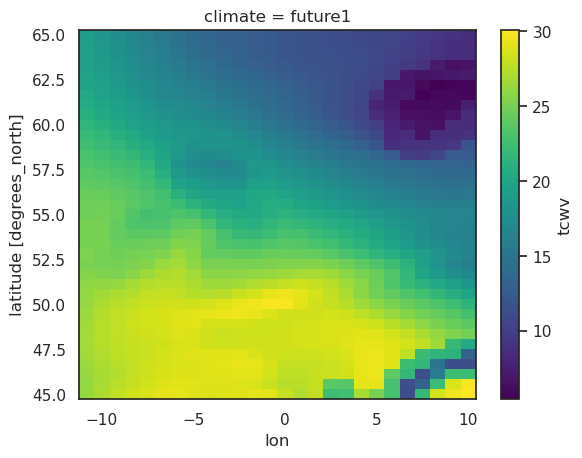

In [25]:
micas_pl.sel(climate='future1').mean(dim=['time', 'member']).tcwv.plot()

## Plot

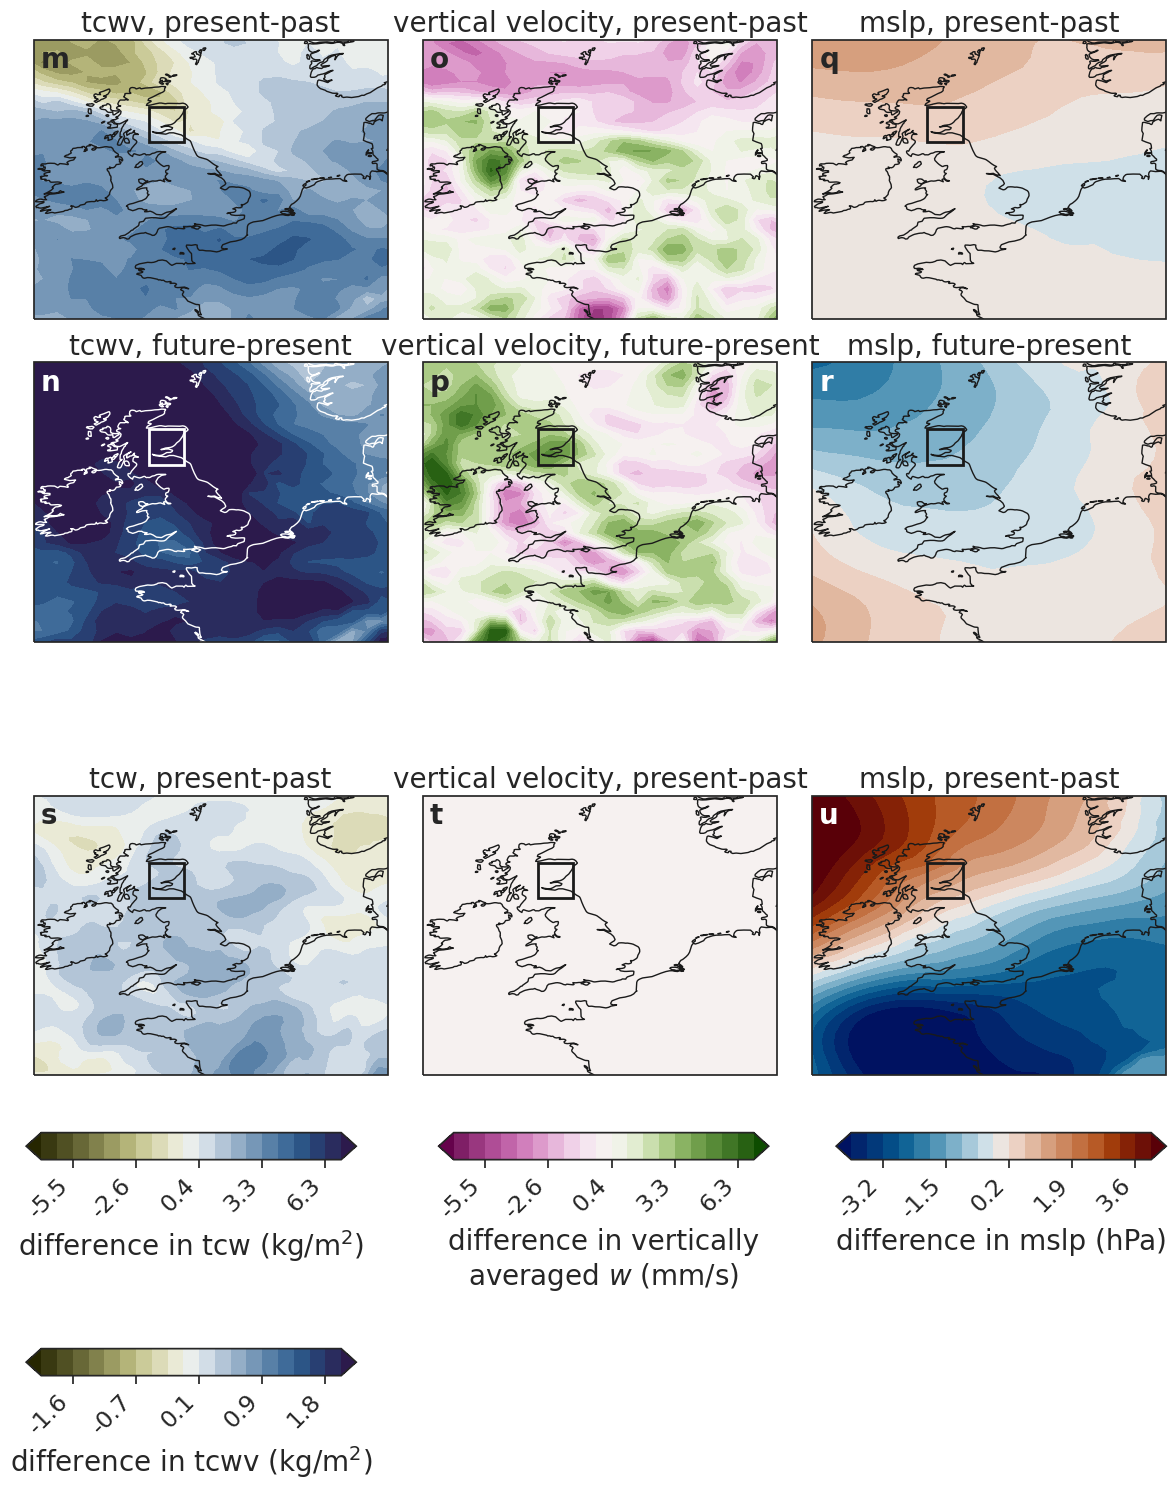

In [46]:
fs = 20
# fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(15, 20), subplot_kw={'projection': ccrs.PlateCarree()})

fig = plt.figure(figsize=(15, 18))

# Big gap between the two row-pairs (rows 1–2 vs 3–4)
hspace = 0.2
outer = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1, 1], hspace=hspace)

# Same inner gap for both pairs
pair_hspace = 0.05

top = outer[0].subgridspec(2, 3, hspace=pair_hspace, wspace=0.1)  # rows 1–2
bot = outer[1].subgridspec(2, 3, hspace=pair_hspace, wspace=0.1)  # rows 3–4

axes = np.empty((4, 3), dtype=object)
for j in range(3):
    axes[0, j] = fig.add_subplot(top[0, j], projection=ccrs.PlateCarree())
    axes[1, j] = fig.add_subplot(top[1, j], projection=ccrs.PlateCarree())
    axes[2, j] = fig.add_subplot(bot[0, j], projection=ccrs.PlateCarree())
    axes[3, j] = fig.add_subplot(bot[1, j], projection=ccrs.PlateCarree())

## ACCESS MICAS ----------------------------
# Plot tcwv
vmax = 2
plot1 = (micas_tempmean.sel(climate='present')-micas_tempmean.sel(climate='1870')).tcwv.mean('member').plot.contourf(
    cmap=cm.broc_r,vmin=-1*vmax, vmax=vmax,extend='both',
    levels=20, ax=axes[0, 0], add_colorbar=False  # Disable individual colorbars
)
plot_tcwv = (micas_tempmean.sel(climate='future1')-micas_tempmean.sel(climate='present')).tcwv.mean('member').plot.contourf(
    cmap=cm.broc_r, vmin=-1*vmax, vmax=vmax, extend='both',
    levels=20, ax=axes[1, 0], add_colorbar=False  # Disable individual colorbars
)

# Plot vertical velocity
vmax = 7
plot3 = ((micas_tempmean.sel(climate='present')-micas_tempmean.sel(climate='1870')).av_w.mean('member')*1000).plot.contourf(
    cmap=cm.bam, vmin=-1*vmax, vmax=vmax, extend='both',
    levels=20, ax=axes[0,1], add_colorbar=False  # Disable individual colorbars
)
plot4 = ((micas_tempmean.sel(climate='future1')-micas_tempmean.sel(climate='present')).av_w.mean('member')*1000).plot.contourf(
    cmap=cm.bam, vmin=-1*vmax, vmax=vmax, extend='both',
    levels=20, ax=axes[1,1], add_colorbar=False  # Disable individual colorbars
)

# Plot mean sea level pressure
vmax = 4
plot5 = (micas_tempmean_sfc.sel(climate='present')-micas_tempmean_sfc.sel(climate='1870')).msl.mean('member').plot.contourf(
    cmap=cm.vik, vmin=-1*vmax, vmax=vmax, extend='both',
    levels=20, ax=axes[0,2], add_colorbar=False  # Disable individual colorbars
)
plot6= (micas_tempmean_sfc.sel(climate='future1')-micas_tempmean_sfc.sel(climate='present')).msl.mean('member').plot.contourf(
    cmap=cm.vik, vmin=-1*vmax, vmax=vmax, extend='both',
    levels=20, ax=axes[1,2], add_colorbar=False  # Disable individual colorbars
)

## ERA5 analogues ----------------------------
# Plot tcw
vmax = 7
plot1 = (era5_dynamics.sel(climate='present')-era5_dynamics.sel(climate='1950')).tcw.plot.contourf(
    cmap=cm.broc_r, vmin=-1*vmax, vmax=vmax, extend='both',
    levels=20, ax=axes[2,0], add_colorbar=False  # Disable individual colorbars
)

# Plot vertical velocity
vmax = 7
plot3 = (era5_dynamics.sel(climate='present')-era5_dynamics.sel(climate='1950')).w.plot.contourf(
    cmap=cm.bam, vmin=-1*vmax, vmax=vmax,extend='both',
    levels=20, ax=axes[2,1], add_colorbar=False  # Disable individual colorbars
)
# Plot mean sea level pressure
vmax = 4
plot5 = ((era5_analogues.sel(climate='present')-era5_analogues.sel(climate='1950')).msl/100).plot.contourf(
    cmap=cm.vik, vmin=-1*vmax, vmax=vmax, extend='both',
    levels=20, ax=axes[2,2], add_colorbar=False  # Disable individual colorbars
)

# Add horizontal colorbars --------------------------------------
bottom = 0.25
height = 0.015
width = 0.22
cbar_ax1 = fig.add_axes([0.12, bottom, width, height])  # Bottom of first column
cbar1 = fig.colorbar(plot1, cax=cbar_ax1, orientation="horizontal", label="difference in tcw (kg/m$^2$)", extend='both')
cbar1.set_label("difference in tcw (kg/m$^2$)", fontsize=fs)
cbar1.ax.xaxis.set_label_position('bottom')
cbar1.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar1.ax.tick_params(labelsize=fs-3)
cbar1.ax.locator_params(nbins=5) # fix the number of ticks
cbar1.update_ticks()

cbar_ax2 = fig.add_axes([0.395, bottom, width, height])  # Bottom of second column
cbar2 = fig.colorbar(plot3, cax=cbar_ax2, orientation="horizontal", label=r"difference in vertically averaged $w$ (Pa/s)", extend='both')
cbar2.set_label("difference in vertically\naveraged $w$ (mm/s)", fontsize=fs)
cbar2.ax.xaxis.set_label_position('bottom')
cbar2.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar2.ax.tick_params(labelsize=fs-3)
cbar2.ax.locator_params(nbins=5) # fix the number of ticks
cbar2.update_ticks()

cbar_ax3 = fig.add_axes([0.66, bottom, width, height])  # Bottom of third column
cbar3 = fig.colorbar(plot5, cax=cbar_ax3, orientation="horizontal", label="difference in mslp (hPa)", extend='both')
cbar3.set_label("difference in mslp (hPa)", fontsize=fs)
cbar3.ax.xaxis.set_label_position('bottom')
cbar3.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar3.ax.tick_params(labelsize=fs-3)
cbar3.ax.locator_params(nbins=5) # fix the number of ticks
cbar3.update_ticks()

cbar_tcwv_ax = fig.add_axes([0.12, bottom-0.12, width, height])  # Bottom of third column
cbar_tcwv = fig.colorbar(plot_tcwv, cax=cbar_tcwv_ax, orientation="horizontal", label="difference in tcwv (kg/m$^2$)", extend='both')
cbar_tcwv.set_label("difference in tcwv (kg/m$^2$)", fontsize=fs)
cbar_tcwv.ax.xaxis.set_label_position('bottom')
cbar_tcwv.formatter = FormatStrFormatter("%.1f")  # Restrict to 2 decimal places
cbar_tcwv.ax.tick_params(labelsize=fs-3)
cbar_tcwv.ax.locator_params(nbins=5) # fix the number of ticks
cbar_tcwv.update_ticks()

# angled labels for colourbars
for cbar in [cbar1, cbar2, cbar3, cbar_tcwv]:  
    for label in cbar.ax.get_xticklabels():  # For horizontal colorbars  
        label.set_rotation(45)  
        label.set_ha('right')  # Align labels to the right for better readability

# turn off the frames for the last row
for ax in axes[3, :]:
    ax.set_frame_on(False)

# Add figure labels ------------------
axes[0, 0].text(0.02, 0.9, "m", transform=axes[0, 0].transAxes, fontsize=fs, fontweight="bold")
axes[1, 0].text(0.02, 0.9, "n", transform=axes[1, 0].transAxes, fontsize=fs, fontweight="bold", color='white')
axes[0, 1].text(0.02, 0.9, "o", transform=axes[0, 1].transAxes, fontsize=fs, fontweight="bold")
axes[1, 1].text(0.02, 0.9, "p", transform=axes[1, 1].transAxes, fontsize=fs, fontweight="bold")
axes[0, 2].text(0.02, 0.9, "q", transform=axes[0, 2].transAxes, fontsize=fs, fontweight="bold")
axes[1, 2].text(0.02, 0.9, "r", transform=axes[1, 2].transAxes, fontsize=fs, fontweight="bold", color='white')
axes[2, 0].text(0.02, 0.9, "s", transform=axes[2, 0].transAxes, fontsize=fs, fontweight="bold")
axes[2, 1].text(0.02, 0.9, "t", transform=axes[2, 1].transAxes, fontsize=fs, fontweight="bold")
axes[2, 2].text(0.02, 0.9, "u", transform=axes[2, 2].transAxes, fontsize=fs, fontweight="bold", color='white')

# Apply Cartopy settings to both axes
titles = [f"tcwv, present-past", f"vertical velocity, present-past", f"mslp, present-past",
         f"tcwv, future-present", f"vertical velocity, future-present",  f"mslp, future-present",
         f"tcw, present-past", f"vertical velocity, present-past", f"mslp, present-past"]

for ax, title in zip(axes.flatten(), titles):
    ax.set_extent(uk, crs=ccrs.PlateCarree())  # Set map extent
    if title == 'tcwv, future-present':
        ax.coastlines(color='white', linewidth=1)  # Add coastlines
        rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                edgecolor='white', 
                                facecolor='none',
                                transform=ccrs.PlateCarree())
    else:
        ax.coastlines(color='k', linewidth=1)  # Add coastlines
        rectangle = patches.Rectangle((-4, 55.5), 2, 2, linewidth=2, 
                                edgecolor='k', 
                                facecolor='none',
                                transform=ccrs.PlateCarree())
    ax.set_title(title, fontsize=fs)  # Set
    ax.add_patch(rectangle)
    rectangle.set_zorder(17)

plt.subplots_adjust(right=0.88)

# Save the figure
# plt.savefig('figures/PAPER8_access_and_era5_dynamics.png', dpi=600, bbox_inches='tight')